In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dfcars = pd.read_csv("../data/mtcars.csv")
dfcars = dfcars.rename(columns={"Unnamed: 0":"name"})
dfcars.head()


,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
y = dfcars['mpg']

In [4]:
allX = dfcars.iloc[:, 2:]

In [5]:
allX.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,8,360.0,175,3.15,3.440,17.02,0,0,3,2


We first of all need to separate the data into a training set and a test set. We can use train_test_split for this

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
allX_train, allX_test, y_train, y_test = train_test_split(allX, y, test_size=0.2, random_state=42)

In [8]:
X_train = allX_train[["wt"]]
X_test = allX_test[["wt"]]

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [11]:
model1.score(X_train, y_train)


0.7701379909791617

In [12]:
model1.score(X_test, y_test)

0.6879761857596269

In [13]:
X_train = allX_train[["hp"]]
X_test = allX_test[["hp"]]

In [14]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [15]:
model2.score(X_train, y_train)

0.650415775991287

In [16]:
model2.score(X_test, y_test)

0.3996010170101514

In [17]:
X_train = allX_train[["drat"]]
X_test = allX_test[["drat"]]

In [18]:
model3 = LinearRegression()
model3.fit(X_train, y_train)

LinearRegression()

In [19]:
model3.score(X_train, y_train)

0.45889832481878434

In [20]:
model3.score(X_test, y_test)

0.4652147268834995

In [21]:
X_train = allX_train[["wt","hp"]]
X_test = allX_test[["wt","hp"]]

In [22]:
model4 = LinearRegression()
model4.fit(X_train, y_train)

LinearRegression()

In [23]:
model4.score(X_train, y_train)

0.8321502526033073

In [24]:
model4.score(X_test, y_test)

0.7880448439485949

# validation 

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
X_train = allX_train[["wt"]]
X_test = allX_test[["wt"]]

In [27]:
model5 = LinearRegression()
scores = cross_val_score(model5, X_train, y_train)
scores

array([0.10736385, 0.49488149, 0.86879651, 0.65179584, 0.73272638])

In [28]:
scores.mean()

0.5711128154689782

In [29]:
X_train = allX_train[["wt","hp"]]
X_test = allX_test[["wt","hp"]]

In [30]:
model6 = LinearRegression()
scores6 = cross_val_score(model5, X_train, y_train)
scores6

array([0.1262545 , 0.6744817 , 0.76712479, 0.76448681, 0.83404541])

In [31]:
scores6.mean()

0.6332786406507414

In [32]:
X_train = allX_train[["wt","hp","drat"]]
X_test = allX_test[["wt","hp","drat"]]

In [33]:
model7 = LinearRegression()
scores7 = cross_val_score(model5, X_train, y_train)
scores7.mean()

0.6571279909053499

In [34]:
X_train = allX_train[["wt","hp","carb"]]
X_test = allX_test[["wt","hp","carb"]]

In [35]:
model8 = LinearRegression()
scores8 = cross_val_score(model5, X_train, y_train)
scores8.mean()

0.6036599344425265

In [36]:
X_train = allX_train[["wt","hp","drat"]]
X_test = allX_test[["wt","hp","drat"]]
model7 = LinearRegression()
model7.fit(X_train, y_train)
model7.score(X_test, y_test)

0.7900492843805205

# Polynomial Regression Example

In [37]:
demo = np.array([1,2,3]).reshape(-1,1)
demo

array([[1],
       [2],
       [3]])

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
PolynomialFeatures(5).fit_transform(demo)

array([[  1.,   1.,   1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.,  16.,  32.],
       [  1.,   3.,   9.,  27.,  81., 243.]])

In [40]:
X_train = allX_train[["wt"]]
X_test = allX_test[["wt"]]

In [41]:
X_train_poly = PolynomialFeatures(2).fit_transform(X_train)
X_test_poly = PolynomialFeatures(2).fit_transform(X_test)

In [42]:
modelpoly2 = LinearRegression()
modelpoly2.fit(X_train_poly, y_train)

LinearRegression()

In [43]:
print(modelpoly2.score(X_train_poly, y_train))
print(modelpoly2.score(X_test_poly, y_test))

0.8548475030225509
0.682183940466357


In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
max_p = 10 
degrees = range(max_p+1)
train_scores = np.zeros(max_p+1)
test_scores = np.zeros(max_p+1)
error_train = np.zeros(max_p+1)
error_test = np.zeros(max_p+1)

In [46]:
for i in degrees:
    if i !=0:
        X_train_poly = PolynomialFeatures(i).fit_transform(X_train)
        X_test_poly = PolynomialFeatures(i).fit_transform(X_test)
        polymodel = LinearRegression()
        polymodel.fit(X_train_poly, y_train)
        prediction_on_training = polymodel.predict(X_train_poly)
        prediction_on_test = polymodel.predict(X_test_poly)
        error_train[i] = mean_squared_error(y_train, prediction_on_training)
        error_test[i] = mean_squared_error(y_test, prediction_on_test)
        train_scores[i] = polymodel.score(X_train_poly, y_train)
        test_scores[i] = polymodel.score(X_test_poly, y_test)
        

In [47]:
train_scores

array([0.        , 0.77013799, 0.8548475 , 0.85493705, 0.85535746,
       0.86830004, 0.87003984, 0.9023398 , 0.91029886, 0.91151736,
       0.9116272 ])

In [48]:
bestd = np.argmin(error_test[1:])+1

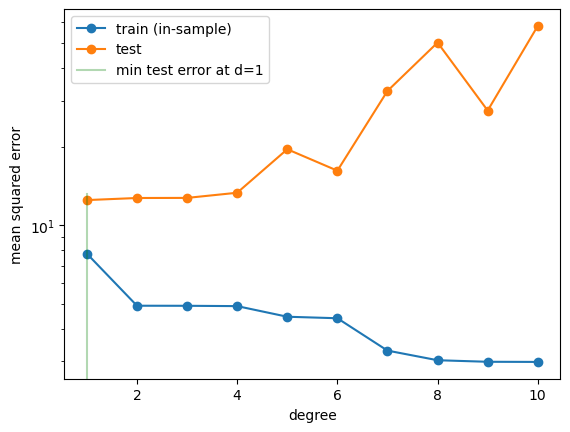

In [49]:
plt.plot(degrees[1:], error_train[1:], marker='o', label='train (in-sample)')
plt.plot(degrees[1:], error_test[1:], marker='o', label='test')
plt.axvline(bestd, 0,0.5, color='g', label="min test error at d=%d"%bestd, alpha=0.3)
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.yscale("log")

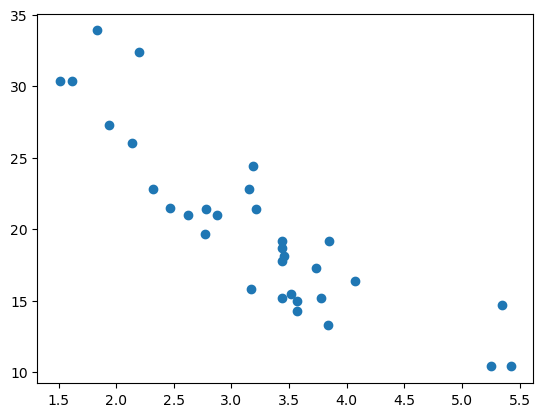

In [50]:
plt.scatter(dfcars["wt"],dfcars["mpg"])

__________________________

In [51]:
X = dfcars[['hp'] ] # Predictor variables (displacement, horsepower, weight)
y = dfcars['wt']                 # Target variable (miles per gallon)

# Split the data into training and test sets (e.g., 70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
X_v_train, X_v_valid, y_v_train, y_v_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [53]:
X_v_train.shape

(17, 1)

In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
degrees = [0, 1, 2, 3, 4, 5]


In [56]:
error_train = np.empty(len(degrees))
error_valid = np.empty(len(degrees))
score_train = np.empty(len(degrees))
score_valid = np.empty(len(degrees))

# Loop through each polynomial degree
for i, d in enumerate(degrees):
    
    # Create polynomial features for the given degree
    poly = PolynomialFeatures(degree=d)
    X_c_train = poly.fit_transform(X_v_train)  # Transform the training set
    X_c_valid = poly.fit_transform(X_v_valid)  # Transform the validation set
    
    # Fit a linear regression model on the transformed training set
    model = LinearRegression()
    model.fit(X_c_train, y_v_train)
    
    # Make predictions on the transformed training and validation sets
    y_train_pred = model.predict(X_c_train)
    y_valid_pred = model.predict(X_c_valid)
    
    error_train[i] = mean_squared_error(y_v_train, y_train_pred)
    error_train[i] = mean_squared_error(y_v_valid, y_valid_pred)
    score_train[i] = model.score(X_c_train, y_v_train)
    score_valid[i] = model.score(X_c_valid, y_v_valid)
    
best_degree_index = np.argmin(error_valid)
best_degree = degrees[best_degree_index]

print(f"Best polynomial degree: {best_degree}")
print(f"Training MSE for best degree: {error_train[best_degree_index]}")
print(f"Validation MSE for best degree: {error_valid[best_degree_index]}")

Best polynomial degree: 0
Training MSE for best degree: 1.789716408304498
Validation MSE for best degree: 0.0


In [57]:
poly = PolynomialFeatures(degree=best_degree)
X_c_train_full = poly.fit_transform(X_train)  # Transform the entire training set
X_c_test = poly.fit_transform(X_test)         # Transform the test set

# Fit the model again
final_model = LinearRegression()
final_model.fit(X_c_train_full, y_train)

# Evaluate the model on the test set
y_test_pred = final_model.predict(X_c_test)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Test set MSE: {test_mse}") 



Test set MSE: 0.8970194000000002


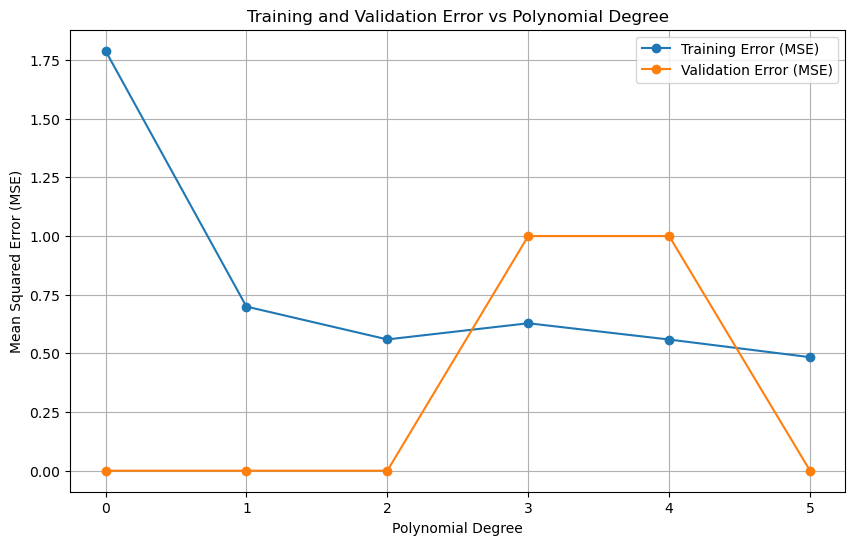

In [58]:


# Plot training and validation errors for each polynomial degree
plt.figure(figsize=(10,6))
plt.plot(degrees, error_train, label='Training Error (MSE)', marker='o')
plt.plot(degrees, error_valid, label='Validation Error (MSE)', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation Error vs Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()


# The above section is research to be completed 

In [59]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [60]:
diabetes=datasets.load_diabetes(as_frame=True)
X = diabetes.data  # Features - data is normalised as default
y = diabetes.target  # Target variable
X = X.drop(columns=["sex"]) #drop sex as it is a binary value
X.describe()
vis=pd.concat([X,y],axis=1)

c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


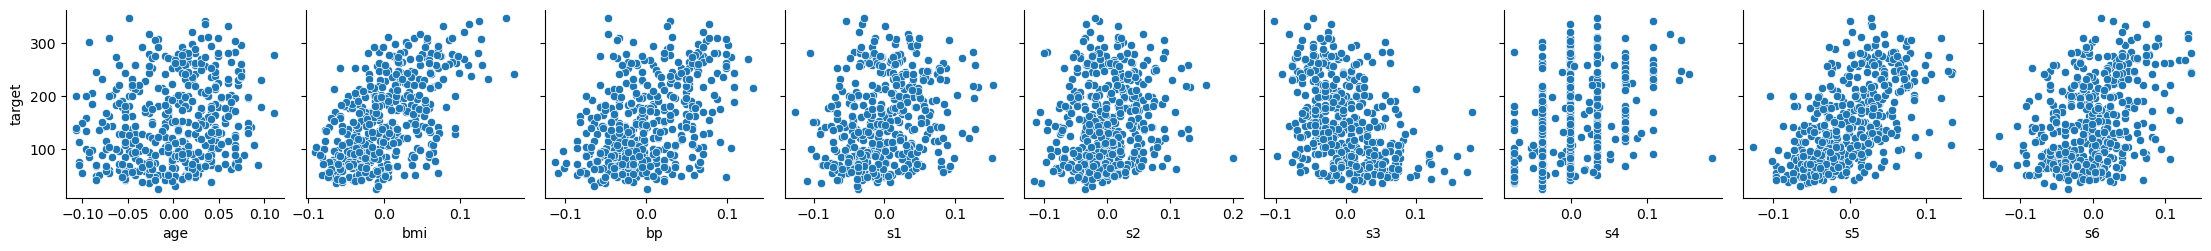

In [62]:
import seaborn as sns
sns.pairplot(vis,y_vars=['target'], x_vars=vis.columns[:-1])

In [63]:
x = X[["bmi", "s5"]]
x.head()

,bmi,s5
0,0.061696,0.019907
1,-0.051474,-0.068332
2,0.044451,0.002861
3,-0.011595,0.022688
4,-0.036385,-0.031988


In [64]:
from sklearn.model_selection import train_test_split #import splitter from sklearn
#splitting initial dataframe to training and test data with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# split training data to Training set and Validation set
from sklearn.model_selection import train_test_split #import splitter from sklearn
#splitting initial dataframe to training and test data with train_test_split
X_v_train, X_v_test, y_v_train, y_v_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [66]:
print("X_v_train:", X_v_train.shape)
print("X_train:", X_train.shape)
print("X:", X.shape)

X_v_train: (282, 9)
X_train: (353, 9)
X: (442, 9)


In [67]:
from sklearn.linear_model import LinearRegression
#model1 will use "wt"
model1 = LinearRegression() #initiate Linear Regression model
model1.fit(X_v_train, y_v_train) # fit model to validation traing

LinearRegression()

In [68]:
model1.score(X_v_train, y_v_train)

0.5122717927084154

In [69]:
model1.score(X_v_test, y_v_test) 

0.45210643413673735

In [70]:
error_train=np.empty(len(degrees))
error_test=np.empty(len(degrees))
score_train=np.empty(len(degrees))
score_test=np.empty(len(degrees))
#for each degree, we now fit on the smaller training set and predict on the validation set
#we accumulate the MSE on both sets in error_train and error_valid
#we then find the degree of polynomial that minimizes the MSE on the validation set.
#your code here
for d in degrees:#for increasing polynomial degrees 0,1,2...
    #Create polynomials from X_v_train and X_v_test
    X_c = PolynomialFeatures(d).fit_transform(X_v_train)
    X_c_val = PolynomialFeatures(d).fit_transform(X_v_test)
    #fit a model linear in polynomial coefficients on the new smaller training set
    est = LinearRegression()
    est.fit(X_c, y_v_train)    
    #predict on new training and validation sets and calculate mean squared error
    error_train[d] = mean_squared_error(est.predict(X_c), y_v_train)
    error_test[d] = mean_squared_error(est.predict(X_c_val), y_v_test)
    score_train[d] = est.score(X_c, y_v_train)
    score_test[d] = est.score(X_c_val, y_v_test)

print("Training Errors:", error_train)
print("Test Errors:", error_test)
print("Training Scores:", score_train)
print("Test Scores:", score_test)

Training Errors: [6.17498512e+03 3.01171442e+03 2.53860993e+03 2.63606738e+03
 1.46133963e-21 7.58701053e-21]
Test Errors: [   5762.51187931    2945.62601617    3777.18309859 1394863.63380282
  559550.17516043  495963.28298773]
Training Scores: [0.         0.51227179 0.58888809 0.57310547 1.         1.        ]
Test Scores: [-7.18411518e-02  4.52106434e-01  2.97434805e-01 -2.58448011e+02
 -1.03077686e+02 -9.12503706e+01]


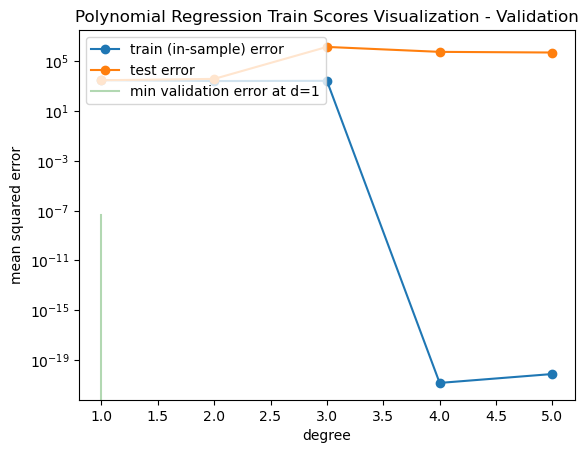

In [71]:
bestd = np.argmin(error_test[1:])+1

# reuse vis from lecture
plt.plot(degrees[1:], error_train[1:], marker='o', label='train (in-sample) error')
plt.plot(degrees[1:], error_test[1:], marker='o', label='test error')
plt.axvline(bestd, 0,0.5, color='g', label="min validation error at d=%d"%bestd, alpha=0.3)
plt.title('Polynomial Regression Train Scores Visualization - Validation')
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.yscale("log")

In [72]:
error_train=np.empty(len(degrees))
error_test=np.empty(len(degrees))
score_train=np.empty(len(degrees))
score_test=np.empty(len(degrees))
#for each degree, we now fit on the smaller training set and predict on the validation set
#we accumulate the MSE on both sets in error_train and error_valid
#we then find the degree of polynomial that minimizes the MSE on the validation set.
#your code here
for d in degrees:#for increasing polynomial degrees 0,1,2...
    #Create polynomials from X_train and X_test
    X_c = PolynomialFeatures(d).fit_transform(X_train)
    X_c_val = PolynomialFeatures(d).fit_transform(X_test)
    #fit a model linear in polynomial coefficients on the new smaller training set
    est = LinearRegression()
    est.fit(X_c, y_train)    
    #predict on new training and validation sets and calculate mean squared error
    error_train[d] = mean_squared_error(est.predict(X_c), y_train)
    error_test[d] = mean_squared_error(est.predict(X_c_val), y_test)
    score_train[d] = est.score(X_c, y_train)
    score_test[d] = est.score(X_c_val, y_test)

print("Training Errors:", error_train)
print("Test Errors:", error_test)
print("Training Scores:", score_train)
print("Test Scores:", score_test)

Training Errors: [6.07639801e+03 2.97299181e+03 2.56974652e+03 1.34271105e+03
 3.00963540e-21 4.87576286e-21]
Test Errors: [  5361.53345724   2986.73292211   3190.34092509  26421.84269663
 659869.53250385 505398.50004798]
Training Scores: [0.         0.51073123 0.57709378 0.77902846 1.         1.        ]
Test Scores: [-1.19629848e-02  4.36268898e-01  3.97838892e-01 -3.98699244e+00
 -1.23547118e+02 -9.43914731e+01]


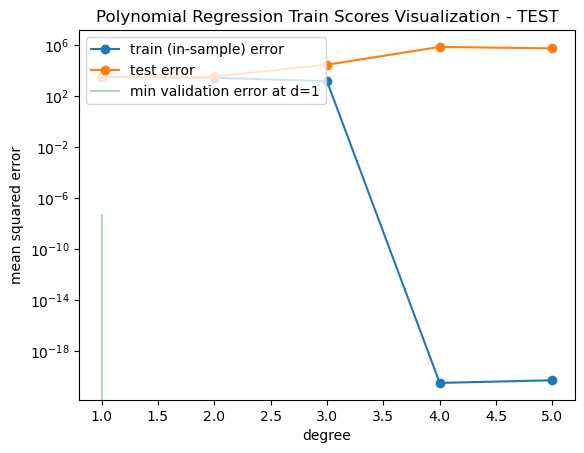

In [73]:
bestd = np.argmin(error_test[1:])+1

# reuse vis from lecture
plt.plot(degrees[1:], error_train[1:], marker='o', label='train (in-sample) error')
plt.plot(degrees[1:], error_test[1:], marker='o', label='test error')
plt.axvline(bestd, 0,0.5, color='g', label="min validation error at d=%d"%bestd, alpha=0.3)
plt.title('Polynomial Regression Train Scores Visualization - TEST')
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.yscale("log")

In [74]:
poly = PolynomialFeatures(degree=3)
# Transform the training data
X_train_poly = poly.fit_transform(X_train)
# Fit the model
model = LinearRegression()
model.fit(X_train_poly, y_train)
# Transform the test data
X_test_poly = poly.transform(X_test)
# Make predictions on the test set
y_pred = model.predict(X_test_poly)
# Calculate and print the Mean Squared Error (MSE)
mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set for Degree 3:", mse_test)

Mean Squared Error on Test Set for Degree 3: 26421.842696629214


In [75]:
y_pred_series = pd.Series(y_pred, name='pred')
y_pred_series

0     160.0
1     194.0
2    -178.0
3       0.0
4     130.0
      ...  
84     96.0
85    138.0
86     96.0
87     60.0
88    146.0
Name: pred, Length: 89, dtype: float64

Actual values


c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Predicted values


c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


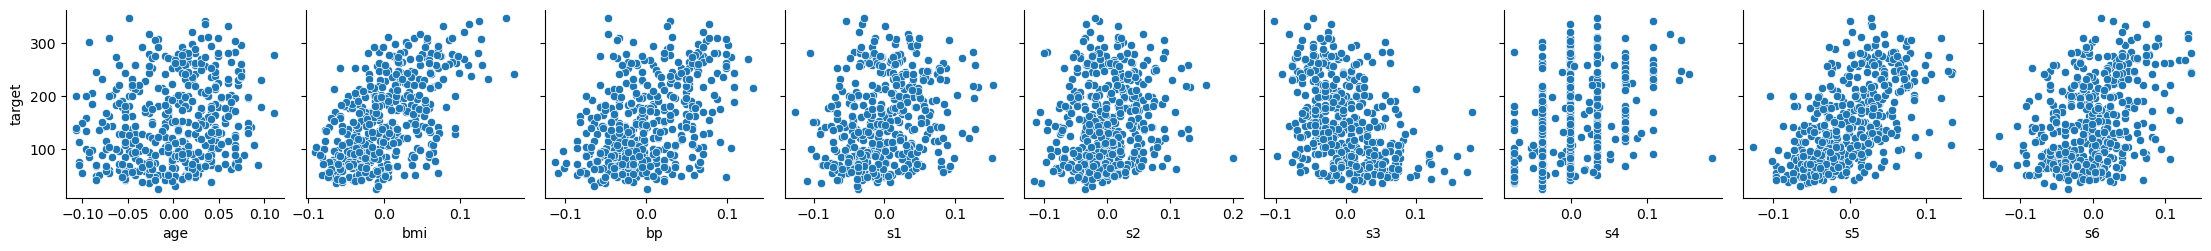

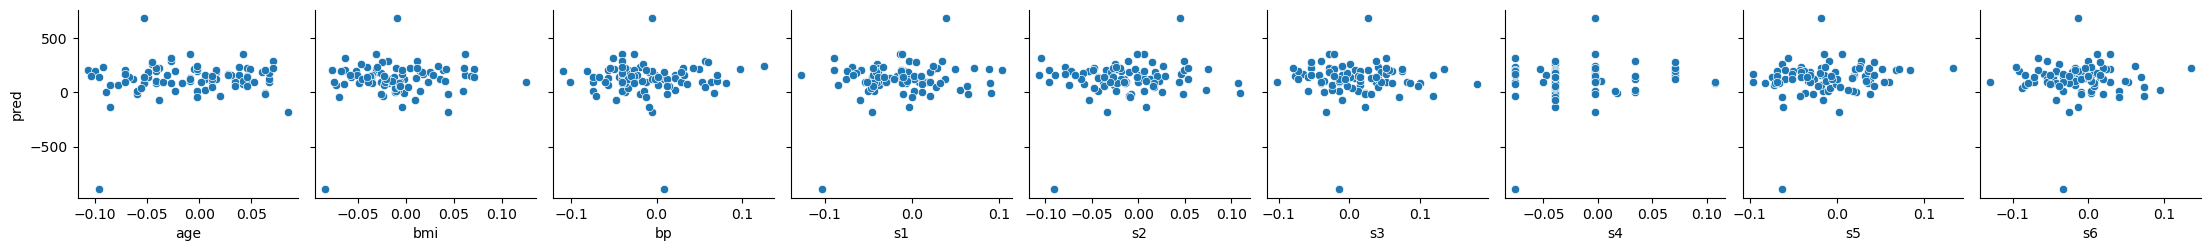

In [76]:
print("Actual values")
vis=pd.concat([X,y],axis=1)
sns.pairplot(vis,y_vars=['target'], x_vars=vis.columns[:-1])

print("Predicted values")
predvis=pd.concat([X,y_pred_series],axis=1)
sns.pairplot(predvis,y_vars=['pred'], x_vars=vis.columns[:-1]) 